# Ex - GroupBy

### Introduction:

GroupBy can be summarizes as Split-Apply-Combine.

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

Check out this [Diagram](http://i.imgur.com/yjNkiwL.png)  
### Step 1. Import the necessary libraries

In [93]:
import warnings
warnings.simplefilter('ignore')

# Отображение графиков в jupiter
%matplotlib inline
# Импорт библиотек для отображения графиков
import seaborn as sns
from matplotlib import pyplot as plt
# Делаем рисунки графиков в svg  более четкими
%config InlineBackend.figure_format='svg'
import numpy as np
# Увеличиваем дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
import pandas as pd
# Отображение всего вывода(по умолчанию отображается только последний)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv). 

### Step 3. Assign it to a variable called drinks.

In [2]:
drinks = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


### Step 4. Which continent drinks more beer on average?

In [5]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       170 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


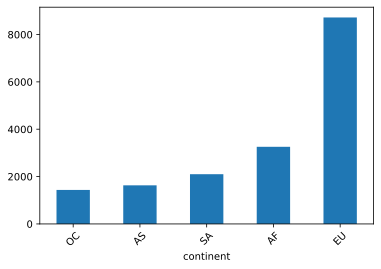

In [17]:
# Группируем по континету и суммируем столбец потребление пива
beer_servings_on_continent = drinks.groupby('continent')['beer_servings'].sum()
# Отсортируем по возрастанию и построим график
beer_servings_on_continent=beer_servings_on_continent.sort_values()
beer_servings_on_continent.plot(kind='bar',rot=45);

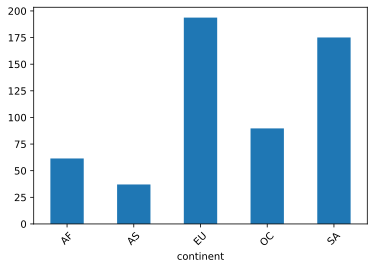

In [21]:
# Среднее потребление пива
drinks.groupby('continent')['beer_servings'].mean().plot(kind='bar',rot=45);

# Графики количественных переменных(seaborn)

#### Distplot
distplot одновременно показывает гистограмму и график плотности распределения.

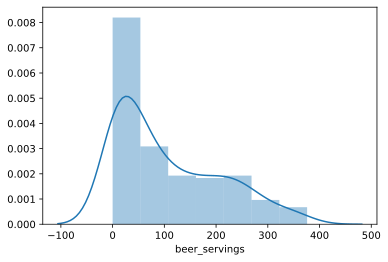

In [48]:
sns.distplot(drinks['beer_servings']);
# Непонятная херня 

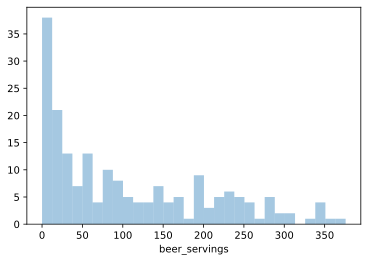

In [49]:
# Вот тут уже понятнее. Это гистограмма получается
# По х у нас потребление пива
# По у частота таких значений
sns.distplot(drinks['beer_servings'],kde=False,bins=30);

### Jointplot
Функция jointplot() показывает совместное распределение по двум переменным. Она имеет параметр kind который может принимать следующие значения:

+ “scatter”
+ “reg”
+ “resid”
+ “kde”
+ “hex”

**Scatter**
Это диаграмма с точками разбросаными по диаграмме. По х значения одной переменной и по у значение другой переменной соответствующей той же строчке.
как в линейных координатах.Например если у какой то страны значение 
**beer_servings** будет 350(находим по оси х значение 350), а значение потребления чистого алкоголя 12(то находим по оси у значение 12)

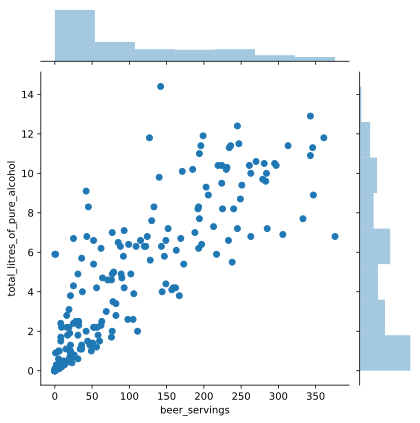

In [55]:
# Не забывай что это диаграммы для количественных переменных
# Не забывай что диаграмма должна откуда то получать данные!!!
sns.jointplot(x='beer_servings',y='total_litres_of_pure_alcohol',data=drinks,kind='scatter');


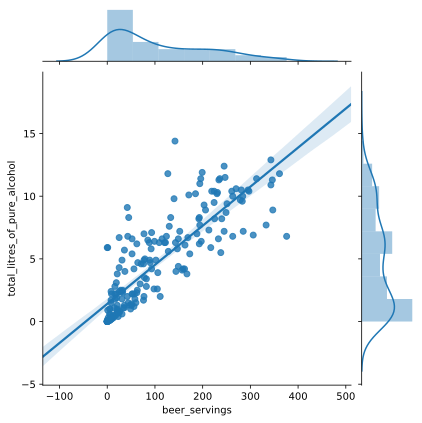

In [56]:
# Добавляет линию регрессии
sns.jointplot(x='beer_servings',y='total_litres_of_pure_alcohol',data=drinks,kind='reg');

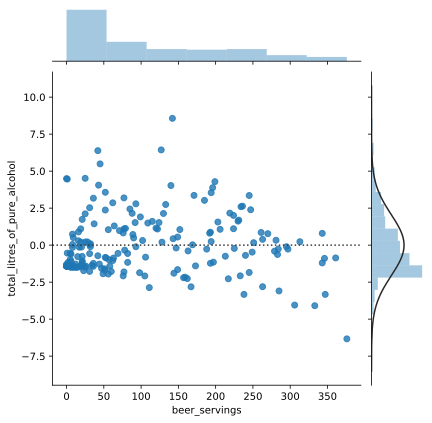

In [57]:
# Непонятная херня
sns.jointplot(x='beer_servings',y='total_litres_of_pure_alcohol',data=drinks,kind='reside');

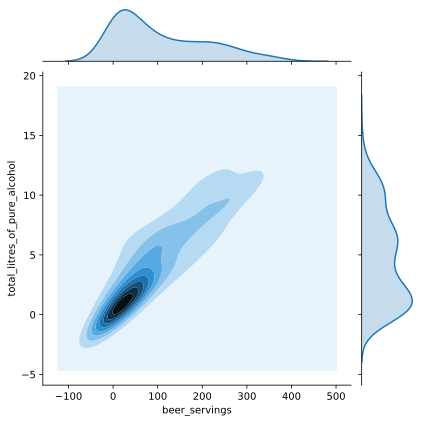

In [59]:
# Диаграма отображающая как площадь данные
#Где значений больше там область  темнее
sns.jointplot(x='beer_servings',y='total_litres_of_pure_alcohol',data=drinks,kind='kde');

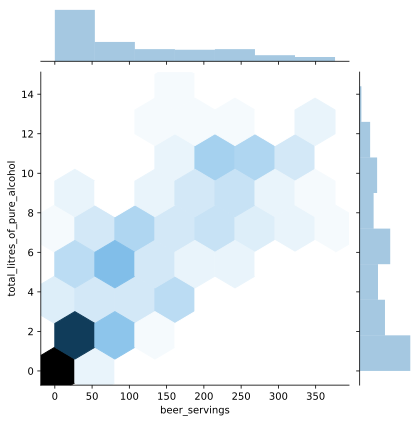

In [60]:
# Площадная диаграмма отображает данные в виде цветных шестиугольников, чем темнее цвет тем больше данных в этом интервале
sns.jointplot(x='beer_servings',y='total_litres_of_pure_alcohol',data=drinks,kind='hex');

### Pairplot 
pairplot показывает отношения между всеми парами переменных.

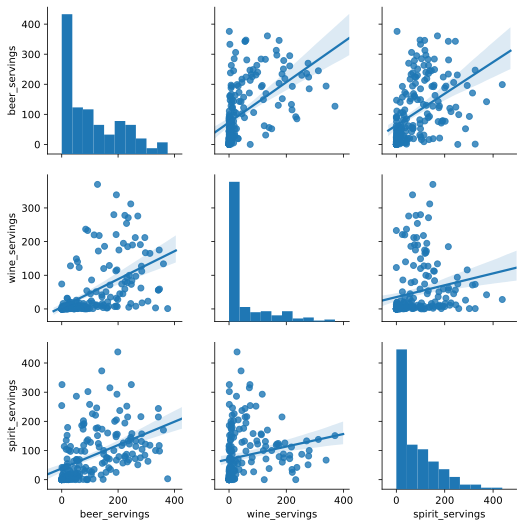

In [69]:
sns.pairplot(drinks[['beer_servings','wine_servings','spirit_servings']],kind='reg')

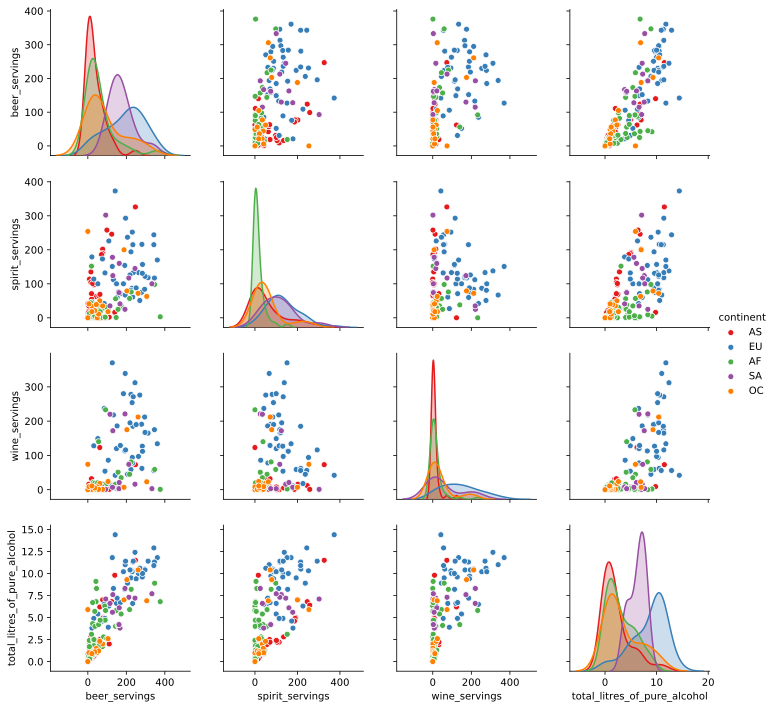

In [70]:
# Вот это понятнее и красивее
# hue -отвечает за категориальную переменную по которой будут различаться данные
# palette за цветовую гамму. Из всех палет лучший это сет1
sns.pairplot(drinks,hue='continent',palette='Set1');

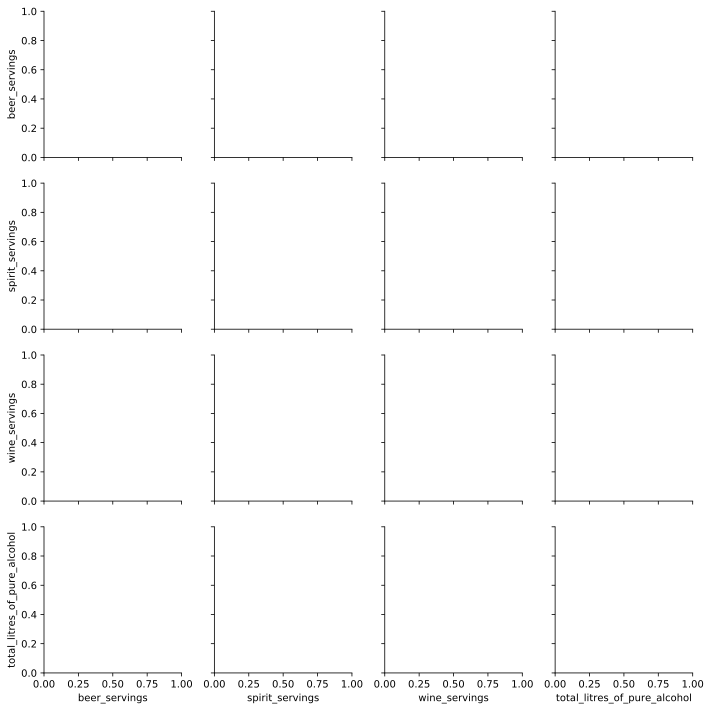

In [77]:
# По сути pairplot — это упрощённая версия другой функции, которая называется PairGrid
# Создает холсты 
sns.PairGrid(drinks);

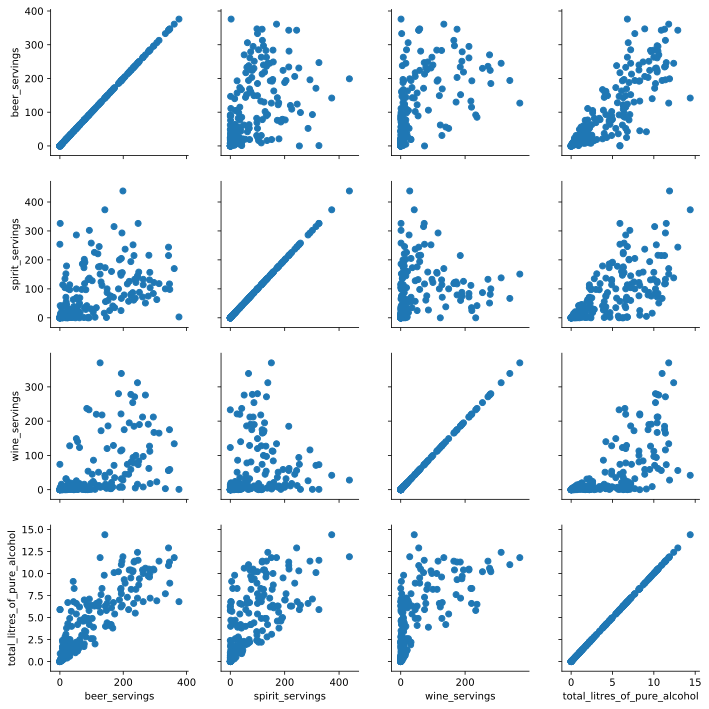

In [78]:
g = sns.PairGrid(drinks)
g.map(plt.scatter)


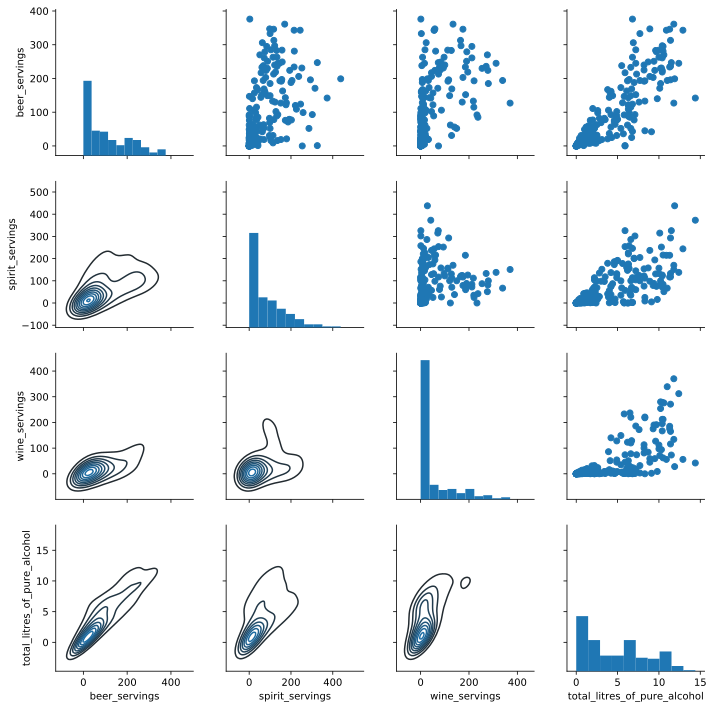

In [80]:
# Можно настраивать какие виды диаграмм нужно отобразить
g = sns.PairGrid(drinks)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot);

Плотность распределения по двум переменным даёт нам градиент. Градиент — вектор, своим направлением указывающий направление наибольшего возрастания некоторой величины \varphiφ , значение которой меняется от одной точки пространства к другой (скалярного поля), а по величине (модулю) равный скорости роста этой величины в этом направлении.

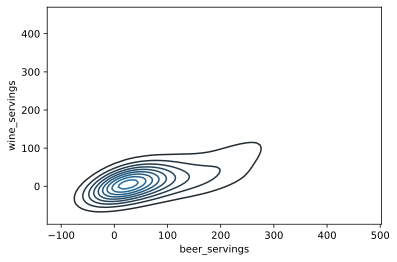

In [81]:
sns.kdeplot(drinks['beer_servings'],drinks['wine_servings']);

### Facet Grid
Facet Grid позволяет визуализировать совместное распределение отдельных признаков нескольких переменных.
Сложная штука. В статье потом можно будет посмотреть


### Rugplot
rugplot показывает то же, что и график плотности распределения, только в одномерной форме. Чем плотнее расположены линии, тем выше плотность. Лучше использовать его совместно с другими видами графиков.

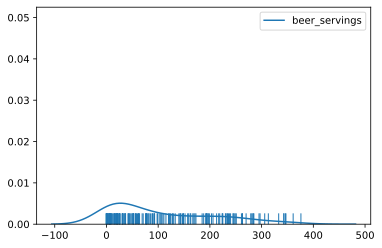

In [85]:
sns.rugplot(drinks['beer_servings'])
sns.kdeplot(drinks['beer_servings'])

In [71]:
##drinks.sort_values(by='total_litres_of_pure_alcohol',ascending=False).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
15,Belarus,142,373,42,14.4,EU
98,Lithuania,343,244,56,12.9,EU
3,Andorra,245,138,312,12.4,EU
68,Grenada,199,438,28,11.9,NaN
45,Czech Republic,361,170,134,11.8,EU


### Визуализация категориальных данных
В seaborn встроены функции для визуализации категориальных данных в следующих форматах:

- factorplot
- boxplot
- violinplot
- stripplot
- swarmplot
- barplot
- countplot

### barplot
Первый тип визуализации — это barplot. У нас есть категориальная переменная и её цифровое значение. Барплот аггрегирует данные по значениям категориальной переменной и применяет определённую функцию к значениям соответсвующих групп цифровой переменной. По умолчанию эта функция — среднее.

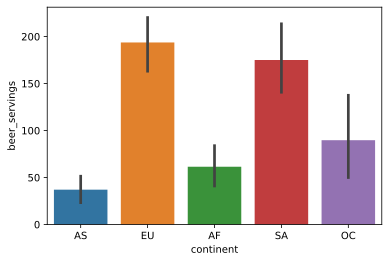

In [87]:
# работает как groupby
sns.barplot(x='continent',y='beer_servings',data=drinks);

In [ ]:
# Эту функцию можно изменить в аргументе estimator:

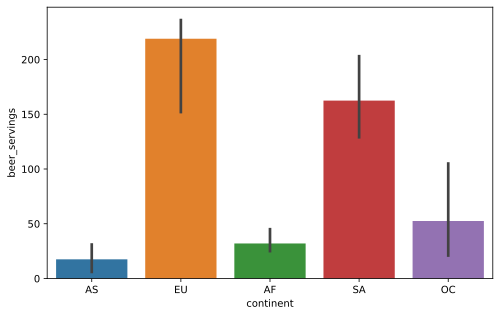

In [94]:
sns.barplot(x='continent',y='beer_servings',data=drinks,estimator=np.median);

### Countplot
** Считает количество значений категориальной переменной**
То есть требует одного параметра, значения которого будет лежать по оси x

А по оси y будет откладываться количество значений этой переменной

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

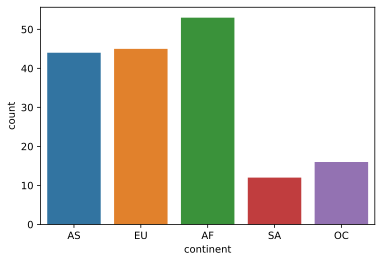

In [46]:
# На это графике по оси х находятся континенты а по оси 
# у скольких стран такой континент
# countplot это просто графическое отображение метода value_counts()
#drinks['continent'].value_counts()
sns.countplot(x='continent',data=drinks)


# boxplot и violinplot
Эти два графика используются для изучения формы распределения.

#### boxplot
Другое название boxplot — ящик с усами или диаграмма размаха. Он был разработан Джоном Тьюки в 1970-х годах.

Такой вид диаграммы в удобной форме показывает медиану (или, если нужно, среднее), нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы. Несколько таких ящиков можно нарисовать бок о бок, чтобы визуально сравнивать одно распределение с другим; их можно располагать как горизонтально, так и вертикально. Расстояния между различными частями ящика позволяют определить степень разброса (дисперсии) и асимметрии данных и выявить выбросы.

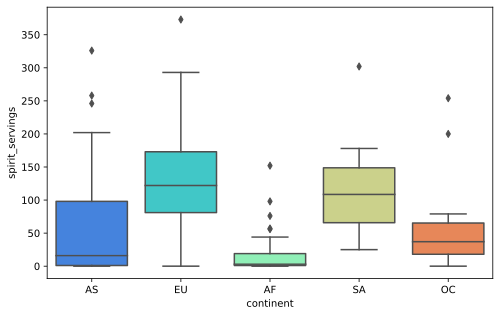

In [95]:
sns.boxplot(x='continent',y='spirit_servings',data=drinks,palette='rainbow');

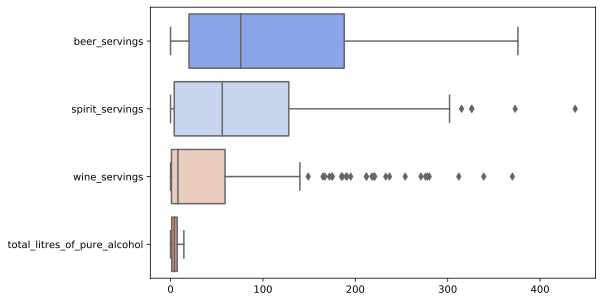

In [104]:
sns.boxplot(data=drinks,palette='coolwarm',orient='h');

In [ ]:
#Можно ввести в график третье измерение ну это если есть бинарные признаки:
# sns.boxplot(
#     x="day", y="total_bill", hue="smoker", data=tips, palette="coolwarm");

## violinplot
Выполняет ту же функцию, что и boxplot. По сути это два повёрнутые на 90 и -90 градусов графика плотности распределения, слипшиеся друг с другом.

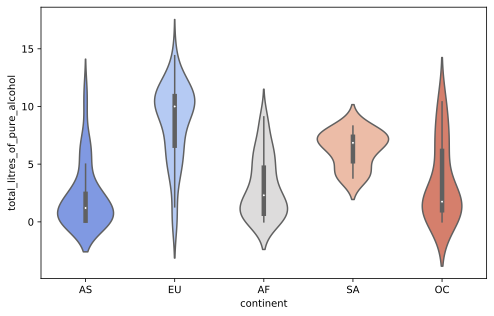

In [106]:
sns.violinplot(x='continent',y='total_litres_of_pure_alcohol',data=drinks,palette='coolwarm');


In [105]:
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

### stripplot и swarmplot
stripplot рисует диаграмму рассеяния, состоящую из одной категориальной переменной. Его можно использовать как самостоятельную фигуру, но лучше сочетать с другими графиками.

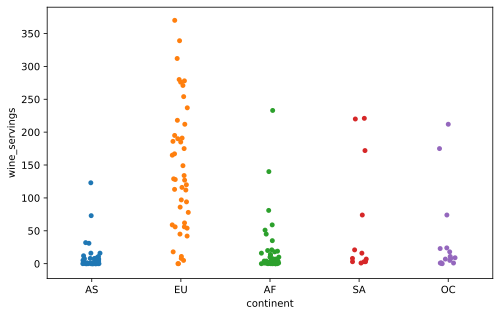

In [107]:
sns.stripplot(x='continent',y='wine_servings',data=drinks);

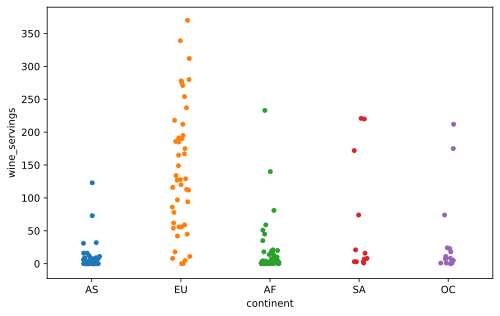

In [108]:
sns.stripplot(x='continent',y='wine_servings',data=drinks,jitter=True);

**Swarmplot** представляет собой ровно то же самое, с той лишь разницей, что точки не накладываются друг на друга.

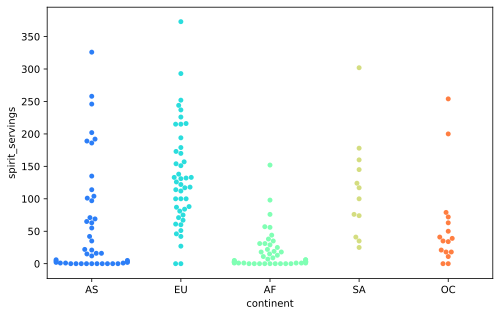

In [111]:

sns.swarmplot(x='continent',y='spirit_servings',data=drinks,dodge=False,palette='rainbow');

 Важно запомнить что графики созданые в одной ячейке по простому. То есть по простому, одно выражение-один график. Будут рисоваться на одном холсте


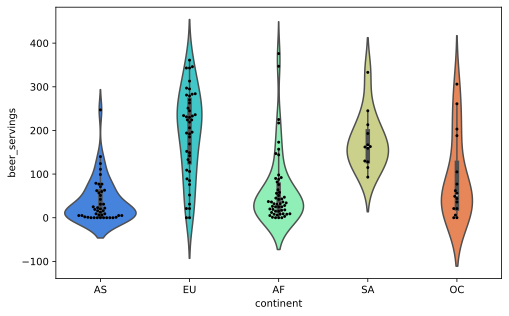

In [113]:
# Вот так кстати виолинплот понятней
sns.violinplot(x='continent',y='beer_servings',data=drinks,palette='rainbow')
sns.swarmplot(x='continent',y='beer_servings',data=drinks,color='black',size=3);

### Матричные графики

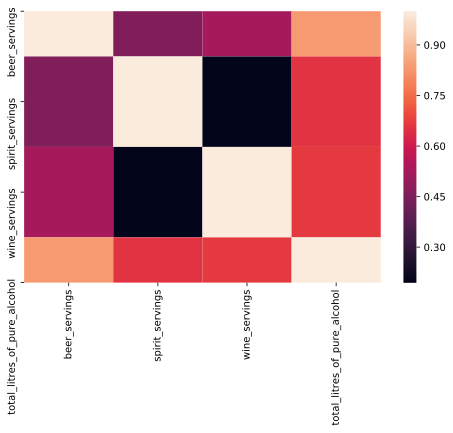

In [116]:
# Тепловая карта корреляций численных значений
sns.heatmap(drinks.corr());

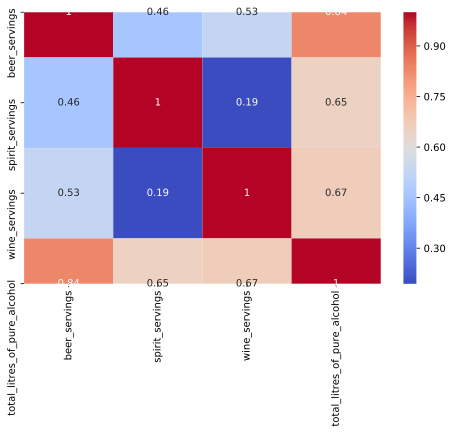

In [117]:
# Тепловая карта понятная со значениями
sns.heatmap(drinks.corr(),cmap='coolwarm',annot=True);

### Step 5. For each continent print the statistics for wine consumption.

In [37]:
# То есть нужно сгруппировать по континетам и выдать статистику потребления вина
c = drinks.groupby('continent')['wine_servings'].describe()
# Порисуем графики
c
sns.countplot()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


### Step 6. Print the mean alcohol consumption per continent for every column

In [120]:
drinks.groupby('continent')['beer_servings','wine_servings','spirit_servings'].mean()

,beer_servings,wine_servings,spirit_servings
continent,,,
AF,61.471698,16.264151,16.339623
AS,37.045455,9.068182,60.840909
EU,193.777778,142.222222,132.555556
OC,89.687500,35.625000,58.437500
SA,175.083333,62.416667,114.750000


In [121]:
diag = drinks.groupby('continent')['beer_servings','wine_servings','spirit_servings'].mean()

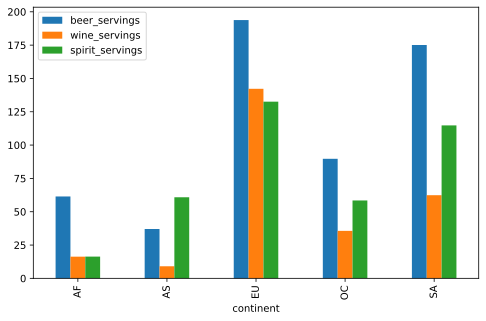

In [125]:
# Вот пример простого и понятного решения.Столбчатая диаграмма отображающая
#  значения категориальных данных(в данном случае в роли категориальных данных выступают континенты)
# а по 3 столбцам отобразились 3 столбца данных
diag.plot(kind='bar');

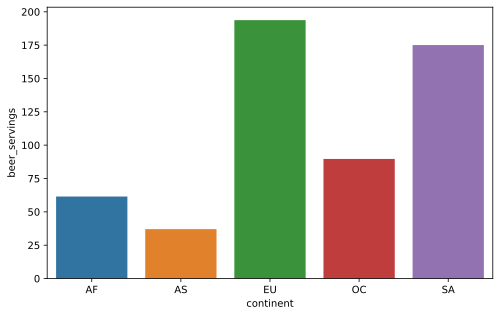

In [126]:
sns.barplot(x=diag.index,y='beer_servings',data=diag);

### Step 7. Print the median alcohol consumption per continent for every column

In [128]:
drinks.groupby('continent')[['beer_servings','spirit_servings','wine_servings']].median()

,beer_servings,spirit_servings,wine_servings
continent,,,
AF,32.0,3.0,2.0
AS,17.5,16.0,1.0
EU,219.0,122.0,128.0
OC,52.5,37.0,8.5
SA,162.5,108.5,12.0


In [129]:
drinks.groupby('continent')[['beer_servings','spirit_servings','wine_servings']].describe()

beer_servings                                                      \
                  count        mean        std   min     25%    50%     75%   
continent                                                                     
AF                 53.0   61.471698  80.557816   0.0   15.00   32.0   76.00   
AS                 44.0   37.045455  49.469725   0.0    4.25   17.5   60.50   
EU                 45.0  193.777778  99.631569   0.0  127.00  219.0  270.00   
OC                 16.0   89.687500  96.641412   0.0   21.00   52.5  125.75   
SA                 12.0  175.083333  65.242845  93.0  129.50  162.5  198.00   

                 spirit_servings              ...                 \
             max           count        mean  ...     75%    max   
continent                                     ...                  
AF         376.0            53.0   16.339623  ...   19.00  152.0   
AS         247.0            44.0   60.840909  ...   98.00  326.0   
EU         361.0            45.0  132.555556  ...  173.00  373.0   
OC         306.0            16.0   58.437500  ...   65.25  254.0   
SA         333.0            12.0  114.750000  ...  148.75  302.0   

          wine_servings                                                   \
                  count        mean        std  min   25%    50%     75%   
continent                                                                  
AF                 53.0   16.264151  38.846419  0.0   1.0    2.0   13.00   
AS                 44.0    9.068182  21.667034  0.0   0.0    1.0    8.00   
EU                 45.0  142.222222  97.421738  0.0  59.0  128.0  195.00   
OC                 16.0   35.625000  64.555790  0.0   1.0    8.5   23.25   
SA                 12.0   62.416667  88.620189  1.0   3.0   12.0   98.50   

                  
             max  
continent         
AF         233.0  
AS         123.0  
EU         370.0  
OC         212.0  
SA         221.0  

[5 rows x 24 columns]

### Step 8. Print the mean, min and max values for spirit consumption.
#### This time output a DataFrame

In [131]:
c = drinks['spirit_servings'].describe()
c

count    193.000000
mean      80.994819
std       88.284312
min        0.000000
25%        4.000000
50%       56.000000
75%      128.000000
max      438.000000
Name: spirit_servings, dtype: float64

In [141]:
print(f'Среднее значение потребления = {c[1]:.{2}f}\n \
Минимальное значение потребления = {c[3]:.{2}f}\n\
Максимальное значение потребления = {c[7]:.{2}f}')
                                     

Среднее значение потребления = 80.99
 Минимальное значение потребления = 0.00
Максимальное значение потребления = 438.00


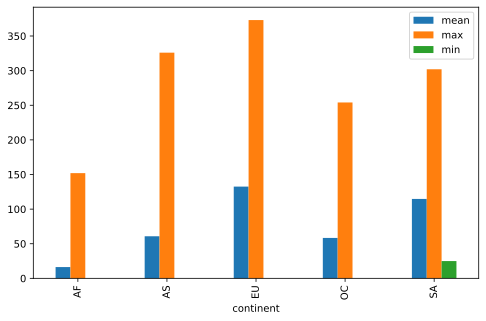

In [144]:
# Чужое решение поизящнее помоему.Нужно не забывать что если нужно применить
# много функций то надо использовать agg([список функций])
drinks.groupby('continent')['spirit_servings'].agg(['mean','max','min']).plot(kind='bar');
